# Проблема корреляции признаков

Часто может оказаться, что признаковое описание объекта избыточно и между различными признаками имеются связи. Для устойчивости работы линейных моделей важно, чтобы среди признаков не было линейных связей (скоррелированных пар).

Например, если мы будем решать задачу регрессии на наборе признаков $x_1 \dots x_n$, среди которых есть связь $x_2 = 5 x_1$, и возьмём линейную модель вида
$$\large y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b,$$
то с учётом данной связи мы можем записать:
$$\large y = w_1 x_1 + w_2 (5x_1) + \dots + w_n x_n + b = (w_1 + 5 w_2) x_1 +  w_3 x_3 + \dots + w_n x_n + b.$$

Таким образом, наша модель теперь учитывает признак $x_1$ с одним "общим" весом $(w_1 + 5 w_2)$, несмотря на то, что он закодирован двумя независимыми параметрами. Решение, то есть набор весовых коэффициентов $w_i$, перестало быть единственным, так как мы теперь можем делать произвольные преобразования с числами $w_1$ и $w_2$ до тех пор, пока $(w_1 + 5 w_2)$ остаётся неизменным:

$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000 ,\, w_2 \rightarrow  w_2 - 1000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000000 ,\, w_2 \rightarrow  w_2 - 1000000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000000000 ,\, w_2 \rightarrow  w_2 - 1000000000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000000000000 ,\, w_2 \rightarrow  w_2 - 1000000000000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + Nan ,\, w_2 \rightarrow  w_2 + Nan\}$$

**Чем это плохо?**

В случае корреляции признаков задача не имеет единственного решения и не существует обратной матрицы, обеспечивающей аналитическое решение. Мы можем использовать градиентные методы для поиска решения, но
при этом веса модели могут неконтролируемо расти. При этом **суммарный вклад** признаков может быть **мал**.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L02/out/carrelation_problem1.png" width="700"></center>

Мы можем оценивать **важность признаков в линейной модели**, используя **веса** перед ними (признаки должны быть нормализованы). Чем больше модуль веса, тем больше вклад. Для коррелированных признаков важность будет переоценена.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L02/out/carrelation_problem2.png" width="700"></center>

Кроме того, нужно помнить, что диапазоны числовых переменных ограничены. При неконтролируемом росте весов значение может выйти за диапазон и превратиться в ~~тыкву~~ `Nan`.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L02/out/carrelation_problem3.png" width="700"></center>

**Что делать?**

Загрузим **датасет Diabetes** ([Diabetes dataset 🛠️[doc]](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)), в котором таргетом является число, характеризующее стадию заболевания, а на признаками явдяются пол, возраст, иднекс массы тела и результаты анализа крови.

In [ ]:
# load dataset
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

x = diabetes.data  # features
y = diabetes.target  # target
print(f"x shape: {x.shape}, y shape: {y.shape}")
print(f"x[0]: \n {x[0]}")
print(f"y[0]: \n {y[0]}")

x shape: (442, 10), y shape: (442,)
x[0]: 
 [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
y[0]: 
 151.0


Быстрее и удобнее можно посмотреть на данные, используя pandas. К тому же Colab добавил возможность визуализации данных (для этого можно тыкнуть синий значок диаграммы ▆ █ ▄  справа от таблицы):

In [ ]:
import pandas as pd

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


 Colab делает не полную визуализацию признаков, но и на данных изображениях можно найти полезную **информацию о выбросах** (из графика **Values**), **плотности распределений** (из графика **Distributions**) и о наличии **зависимости между переменными** (из графика **2-d distributions**).

Кроме того, можно тыкнуть на рисунок, посмотреть и скопировать код визуализации, чтобы применить к другим данным или изменить под свои нужды. Так нажав на **2-d distributions**, скопировав код и поменяв названия признаков, мы можем увидеть, что значения признаков *s1* и *s2* имеют зависимость, близкую к линейной, что не очень хорошо (почему, обсудим позже).


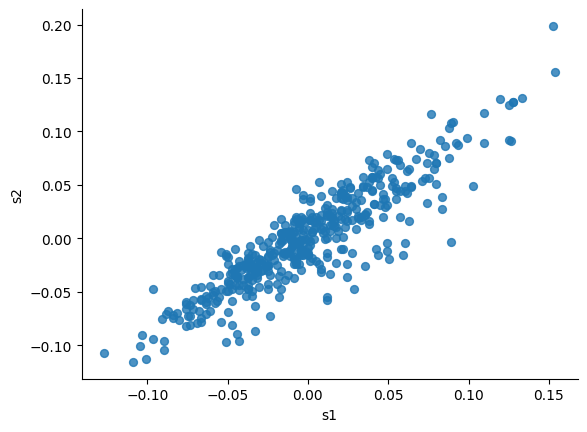

In [ ]:
from matplotlib import pyplot as plt

diabetes_df.plot(kind='scatter', x='s1', y='s2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Теперь давайте посмотрим на сами данные. У нас есть 441 строк, в каждой из которой по 30 колонок. Такие колонки называют признаками или *features*. Визуализируем статистики признаков (mean, std, min и тд).

In [ ]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


Данные немного странно нормализованы (они нормализованны так, чтобы сумма квадратов значений в каждом столбце была единица), для линейной модели - это не очень хорошо, применим StandartScaler.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

print(y_val.shape)

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_norm = scaler_x.fit_transform(x_train)
y_train_norm = scaler_y.fit_transform(y_train[:, np.newaxis])[:, 0]

x_val_norm = scaler_x.transform(x_val)
y_val_norm = scaler_y.transform(y_val[:, np.newaxis])[:, 0]

diabetes_train_norm = pd.DataFrame(x_train_norm, columns=diabetes.feature_names)
diabetes_train_norm.describe()

(40,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,357.000000,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02
mean,0.000000,1.393221e-16,3.731842e-18,-3.483053e-17,2.487895e-17,5.970947e-17,-3.731842e-17,1.940558e-16,-4.478211e-17,-5.473368e-17
std,1.001404,1.001404e+00,1.001404e+00,1.001404e+00,1.001404e+00,1.001404e+00,1.001404e+00,1.001404e+00,1.001404e+00,1.001404e+00
min,-2.270445,-9.375219e-01,-1.940782e+00,-2.325855e+00,-2.297099e+00,-2.405184e+00,-2.159254e+00,-1.589497e+00,-2.246327e+00,-2.884891e+00
25%,-0.805273,-9.375219e-01,-7.150146e-01,-7.634792e-01,-7.436137e-01,-6.446946e-01,-7.605274e-01,-8.182530e-01,-7.280712e-01,-7.115432e-01
50%,0.120100,-9.375219e-01,-1.599503e-01,-1.243256e-01,-9.877082e-02,-7.764557e-02,-1.388714e-01,-4.700915e-02,-3.140936e-02,-1.607182e-02
75%,0.814129,1.066642e+00,6.957739e-01,7.278792e-01,6.046942e-01,6.014946e-01,5.604918e-01,7.242347e-01,6.740094e-01,5.924657e-01
max,2.356416,1.066642e+00,3.424840e+00,2.716357e+00,3.301310e+00,4.214784e+00,3.824186e+00,3.878622e+00,2.833661e+00,2.852748e+00


Визуализируем линейные зависимости между признаками при помощи построения матрицы попарных корреляций.

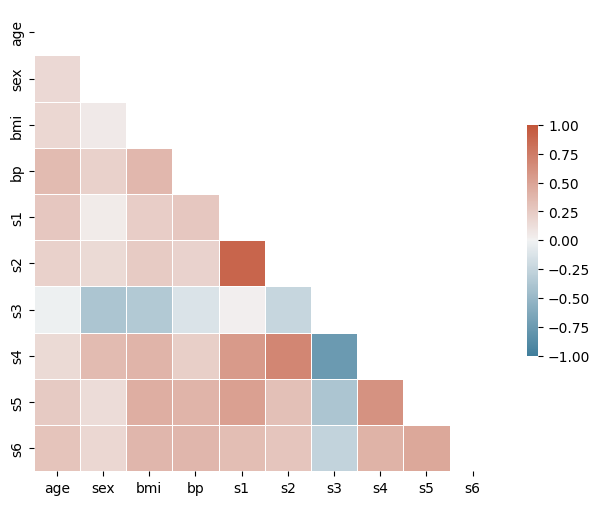

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr = diabetes_train_norm.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.show()

Как мы уже видели наших данных сильно скоррелированы признаки S1 и S2.

В случае корреляции можно:
- **добавить регуляризацию**;
- **оставить один признак**;
- если есть вероятность, что при удалении признаков часть информации будет потеряна, можно оставить **один признак** неизменным и вычесть его из остальных (оставить только **разницу**).


## Регуляризация


### L2 vs L1

Мы можем ограничить значения весов, введя в функционал ошибок
специальную добавку, называемую регуляризацией. L2-регуляризация имеет формулу:


$$\large L_2 = \alpha \sum_i w_i^2,$$
где $\alpha$ — это коэффициент регуляризации.


 Введение **L2-регуляризации** приводит к тому, что **большие веса больше штрафуются** и предпочтение отдается решениям, использующим **малые значения весов**. При этом модель будет **сохранять скоррелированные и неважные признаки с маленькими весами**.

Это связано с градиентом $L_2$:
$$\large L'_{2w_i} = 2\alpha w_i$$
Он будет “тянуть” модель в сторону большого количества маленьких весов.

Для отбора признаков можно использовать L1-регуляризацию, она одинаково "штрафует" модель за любые ненулевые веса.

$$\large L_1 = \alpha \sum_i |w_i|$$
$$\large L_{1w_i}' = \alpha, \text{  где } w_i\neq 0$$



Посмотрим, как это работает на практике. Для этого применим для этого применим к данным Diabetes линейные модели с регуляризацией, а именнно [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#ridge) (L2 регуляризация), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#lasso) (L1 регуляризация). Посмотрим на веса признаков при различных значениях $\alpha$.

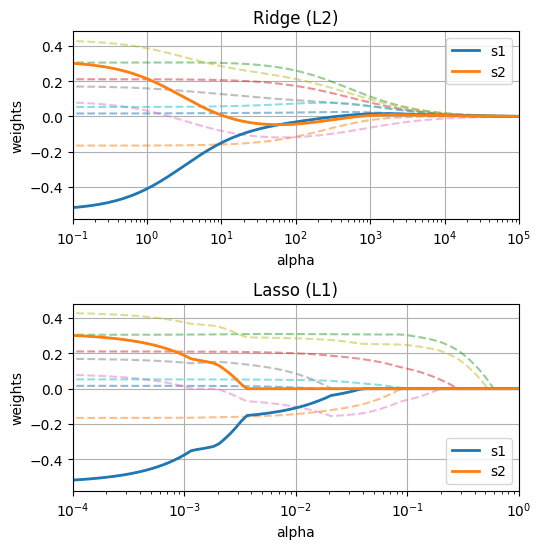

In [ ]:
from sklearn.linear_model import Ridge, Lasso

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

fig, axs = plt.subplots(figsize=(6, 6), nrows=2, ncols=1)
fig.tight_layout(pad=4.0)

for i, model, model_name, xlim in zip(
    [0, 1],
    [Ridge, Lasso],
    ['Ridge (L2)', 'Lasso (L1)'],
    [[0.1, 100_000], [0.0001, 1]]
):
    coefs = []
    coefs_corr = []
    for a in alphas:
        reg = model(alpha=a)
        reg.fit(x_train_norm, y_train_norm)
        coefs_corr.append(reg.coef_[4:6])
        coefs.append(reg.coef_)
    axs[i].plot(alphas, coefs, linestyle='--', alpha=0.5)
    axs[i].plot(alphas, coefs_corr, linewidth=2, label=['s1', 's2'])
    axs[i].set(xscale='log', title=model_name, xlabel='alpha', ylabel='weights', xlim=xlim)
    axs[i].legend()
    axs[i].grid(True)

Видим, что при маленьком $\alpha$ - веса не нулевые. При очень большом $\alpha$ веса стремятся к 0 для всех признаков - это значит, что вклад в Loss регуляризации становится больше, чем вклад ошибки предсказания.

Нам интересно поведение весов перед признаками  **s1** и  **s2**, т.к. они скоррелированны. В случае L2 веса принимают близкое небольшое значение и сходятся к 0 практически одновременно. В случае L1 - сначала к 0 сходится вес перед **s2**, затем вес перед **s1**.

Интересно отметить, что коэффициенты $\alpha$ при L1 и L2 отличаются по порядку величины. Это связано с тем, что L2 работает с квадратами весов, а L1 с модулями.


Для получения интуиции, что L1-регуляризация позволяет отбирать признаки, часто используют картинку ниже. Функция ошибки задается как сумма ошибки предсказания $L_{\text{err}}$ и регуляризации $L_\text{reg}$.

$$ Loss = L_{\text{err}} + L_\text{reg}$$
где $L_\text{reg}$ - L1 или L2 регуляризация.

Зафиксируем ограничение $L_\text{reg}=1$ и $\alpha = 1$. В пространстве весов это даст для L2 ограничение:
$$w_1^2+w_2^2 = 1$$
Это - единичная окружность (голубая закрашенная область на рисунке ниже слева).

Для L1 ограничение:
$$|w_1|+|w_2| = 1$$
Это - ромб (голубая закрашенная область на рисунке ниже справа).

В реальной задаче значение $L_\text{reg}$ будет меняться при минимизации Loss.


<center><img src ="https://ml.gan4x4.ru/msu/dep-2.1/L02/loss_landscape_with_regularization.gif" width="800"></center>

<center><em>Source: <a href="https://people.eecs.berkeley.edu/~jrs/189/">Introduction to Machine Learning
</a></em></center>


Вращающиеся овалы показывают, как член Loss, отвечающий за ошибку предсказания $L_{\text{err}}$ (овалы  $L_{\text{err}}=\text{const}$, точка  $\min{L_{\text{err}}}$), изменяется в результате изменения значений признаков и таргета. Оранжевая точка — это минимальное значение для функции Loss с регуляризацией. Видим что:


- Для **L2** оранжевая точка будет кататься **по касательной к окружности**.
- Для **L1** оранжевая точка будет зависать в **уголу ромба**, что соответствует **обнулению веса** одного из признаков.